#### StatsModels 샘플데이터
- R의 통계분석 및 시계열 분석을 파이썬에서 실행해주는 기능
- Rdataset 프로젝트 : R에서 사용하던 1000개 이상의 표준 데이터셋 제공
    - https://github.com/vincentarelbundock/Rdatasets
- 데이터셋 목록 : http://vincentarelbundock.github.io/Rdatasets/datasets.html
- package명과 item명 파악후 get_rdataset명령 이용

##### 1. 타이타닉 데이터

In [2]:
data = sm.datasets.get_rdataset("Titanic", package="datasets")

In [4]:
type(data)

statsmodels.datasets.utils.Dataset

In [8]:
data.data.tail() # data속성이 dataframe

,Class,Sex,Age,Survived,Freq
27,Crew,Male,Adult,Yes,192
28,1st,Female,Adult,Yes,140
29,2nd,Female,Adult,Yes,80
30,3rd,Female,Adult,Yes,76
31,Crew,Female,Adult,Yes,20


In [9]:
print(data.__doc__)

+---------+-----------------+
| Titanic | R Documentation |
+---------+-----------------+

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

    Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

+----+----------+---------------------+
| No | Name     | Levels              |
+----+----------+---------------------+
| 1  | Class    | 1st, 2nd, 3rd, Crew |
+----+----------+---------------------+
| 2  | Sex      | Male, Female        |
+----+----------+---------------------+
| 3  | Age      | Child, Adult        |
+----+----------+---------------------+
| 4  | Survived | No, Yes             |
+----+----------+------------------

##### 2. 미국 강수량

In [11]:
data2 = sm.datasets.get_rdataset("precip")

In [22]:
df = data2.data
df.tail()

,dat
65,17.4
66,40.8
67,29.1
68,14.6
69,59.2


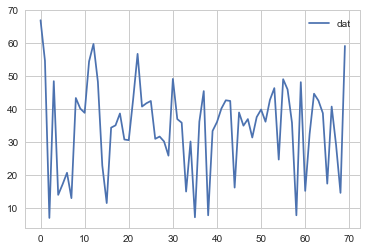

In [19]:
df.plot()
plt.show()

다음이 40정도일 것이라고 예상됨(기댓값), 이게 전부

##### 3. 황체형성 호르몬 수치 시계열 데이터

In [24]:
data3 = sm.datasets.get_rdataset("lh")

In [25]:
df2 = data3.data
df2.tail()

,time,value
43,44,2.6
44,45,2.1
45,46,3.4
46,47,3.0
47,48,2.9


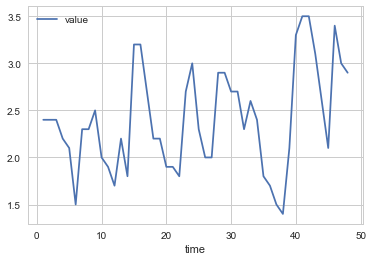

In [26]:
df2.plot(x="time", y="value")
plt.show()

##### 4. 호흡기질환 사망자수

In [27]:
# package의 default값은 'dataset'
data4 = sm.datasets.get_rdataset("deaths","MASS")

In [28]:
df3 = data4.data
df3.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [29]:
# time column : datetime으로 포맷 변경
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime, dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

In [33]:
df3["datetime"] = df3.time.map(yearfraction2datetime)
df3.tail()

,time,value,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


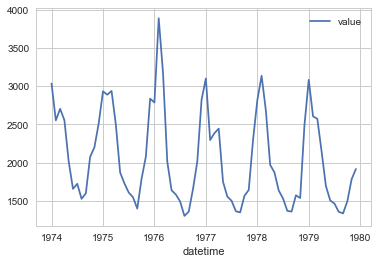

In [34]:
df3.plot(x='datetime', y='value')
plt.show()

경향성을 보이므로 좀 더 정확한예측이 가능하다

In [35]:
data = sm.datasets.get_rdataset("AirPassengers")

In [36]:
df = data.data
df.tail()

,time,value
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [40]:
df['datetime'] = df.time.map(yearfraction2datetime)
df.tail()

,time,value,datetime
139,1960.583333,606,1960-08-01
140,1960.666667,508,1960-09-01
141,1960.750000,461,1960-10-01
142,1960.833333,390,1960-11-01
143,1960.916667,432,1960-12-01


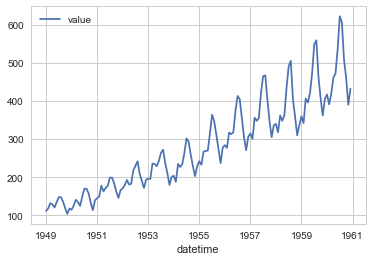

In [42]:
df.plot(x='datetime', y='value')
plt.show()

이 또한 좀 더 정확한 예측이 가능할 것으로 보인다.